In [5]:
# Cell 1: Imports & Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("../data/raw/gun_vs_ball.csv")

# FILTER: True Gamers only (Playtime > 0) & Valid Scores
df_clean = df[(df['playtime'] > 0) & (df['metacritic'].notna())].copy()

# DEFINE COHORT: Gun & Ball vs The World
target_genres = ['Gun', 'Ball']
df_clean['Cohort'] = df_clean['category'].apply(
    lambda x: 'Gun & Ball' if x in target_genres else 'The Rest'
)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_23924\862379703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Cohort', y='metacritic', palette="Set2")


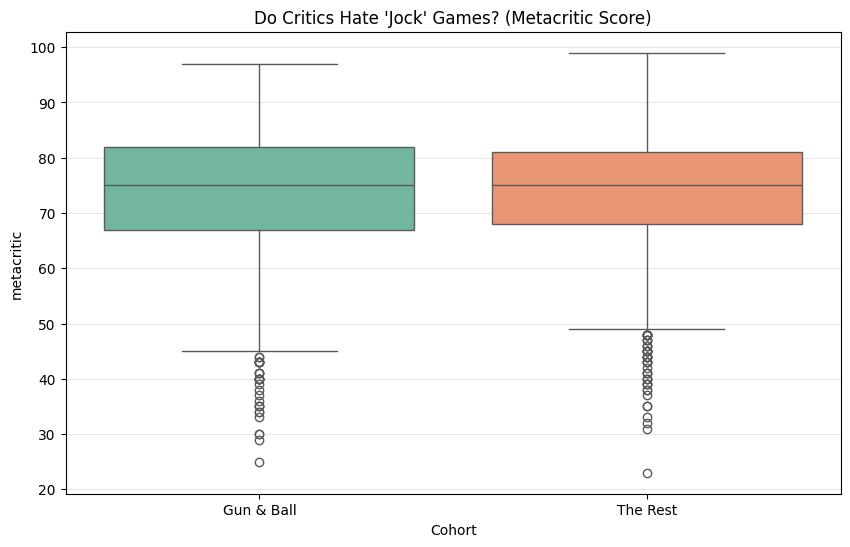

--- Critical Quality (Mean) ---
Cohort
Gun & Ball    73.22
The Rest      73.89
Name: metacritic, dtype: float64


In [6]:
# Cell 2: The "Quality" Test (Critics)
# Hypothesis: Critics hate these games.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Cohort', y='metacritic', palette="Set2")
plt.title("Do Critics Hate 'Jock' Games? (Metacritic Score)")
plt.grid(axis='y', alpha=0.3)
plt.show()

# Print Stats
print("--- Critical Quality (Mean) ---")
print(df_clean.groupby('Cohort')['metacritic'].mean().round(2))

C:\Users\ahmed\AppData\Local\Temp\ipykernel_23924\3789640106.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_playtime, x='Cohort', y='playtime', palette="Set2")


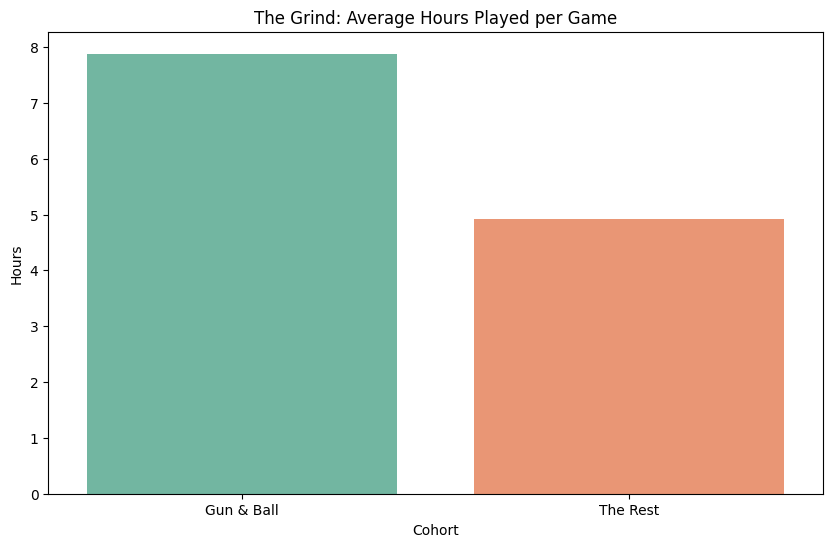


--- Dedication (Average Hours) ---
Cohort
Gun & Ball    7.88
The Rest      4.91
Name: playtime, dtype: float64


In [3]:
# Cell 3: The "Addiction" Test (Playtime)
# Hypothesis: These games are played longer.
plt.figure(figsize=(10, 6))
# Calculate mean for cleaner bar chart
avg_playtime = df_clean.groupby('Cohort')['playtime'].mean().reset_index()
sns.barplot(data=avg_playtime, x='Cohort', y='playtime', palette="Set2")
plt.title("The Grind: Average Hours Played per Game")
plt.ylabel("Hours")
plt.show()

# Print Stats
print("\n--- Dedication (Average Hours) ---")
print(df_clean.groupby('Cohort')['playtime'].mean().round(2))

C:\Users\ahmed\AppData\Local\Temp\ipykernel_23924\1974300340.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x='Cohort', y='rating', palette="Set2")


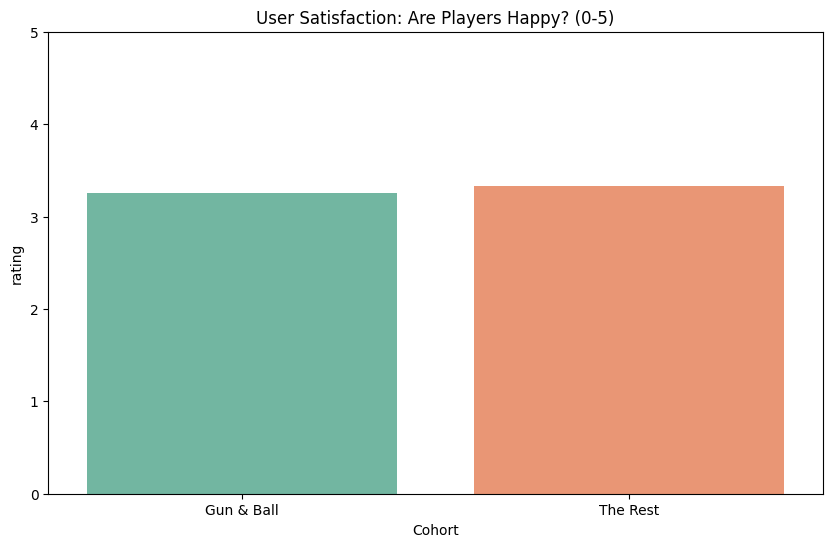


--- Soul Check (User Rating) ---
Cohort
Gun & Ball    3.26
The Rest      3.33
Name: rating, dtype: float64


In [4]:
# Cell 4: The "Soul" Test (User Happiness)
# Hypothesis: Players are less happy with these corporate titles.
plt.figure(figsize=(10, 6))
avg_rating = df_clean.groupby('Cohort')['rating'].mean().reset_index()
sns.barplot(data=avg_rating, x='Cohort', y='rating', palette="Set2")
plt.title("User Satisfaction: Are Players Happy? (0-5)")
plt.ylim(0, 5)
plt.show()

# Print Stats
print("\n--- Soul Check (User Rating) ---")
print(df_clean.groupby('Cohort')['rating'].mean().round(2))